In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely import distance
import matplotlib.pyplot as plt
import seaborn as sns
import timedelta
from pathlib import Path

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


### 도로 데이터 

In [3]:
roads = gpd.read_file("./도로/C_UQ151.shp", encoding="euc-kr")

In [4]:
roads.head()

,PRESENT_SN,LCLAS_CL,MLSFC_CL,SCLAS_CL,ATRB_SE,WTNNC_SN,NTFC_SN,DGM_NM,DGM_AR,DGM_LT,SIGNGU_SE,GRAD_SE,ROAD_TY,ROAD_NO,ROAD_ROLE,DRAWING_NO,EXCUT_SE,CREATE_DAT,geometry
0,11380UQ151PS202103160017,UQS122,None,None,UQS122,11380URZ202103030004,11380NTC202103030003,소로3류,1195.0,365.0,11000,소로,3,76,PMI0004,소로3-76,EMA0009,2021/03/15,"POLYGON ((192686.378 459250.947, 192741.008 45..."
1,11000UQ151PS201912164642,UQS121,None,None,UQS121,11000URZ201303140879,11000NTC201303146777,소로2류,247.0,84.0,11000,소로,2,109,PMI0004,None,EMA0009,2019/12/14,"POLYGON ((183848.032 443543.621, 183841.182 44..."
2,11230UQ151PS202306120002,UQS122,None,None,UQS122,11230URZ202304030005,11230NTC202306070001,소로3류,609.0,190.0,11000,소로,3,(1),PMI0004,소로3-(1),EMA0009,2023/06/11,"POLYGON ((205077.993 452929.494, 205073.212 45..."
3,11000UQ151PS201912156667,UQS190,None,None,UQS190,11000URZ000000001511,None,기타도로시설,24897.0,6728.0,11000,None,None,None,None,None,EMA0009,2019/12/14,"POLYGON ((210244.47 444490.33, 210248.96 44448..."
4,11000UQ151PS202307130002,UQS118,None,None,UQS118,11000URZ202305310005,11000NTC202305310002,중로2류,1720.0,282.0,11000,중로,2,None,PMI0003,중로2-,EMA0009,2023/07/12,"POLYGON ((198273.8 451786.26, 198276.7 451772...."


In [5]:
roads.to_crs(epsg=5179, inplace=True)

In [6]:
roads_poly = roads.geometry

In [7]:
roads_poly.head()

0    POLYGON ((948643.593 1959728.281, 948698.03 19...
1    POLYGON ((939725.369 1944073.878, 939718.49 19...
2    POLYGON ((960996.737 1953343.574, 960991.961 1...
3    POLYGON ((966116.393 1944880.464, 966120.846 1...
4    POLYGON ((954189.203 1952236.881, 954192.031 1...
Name: geometry, dtype: geometry

<Axes: >

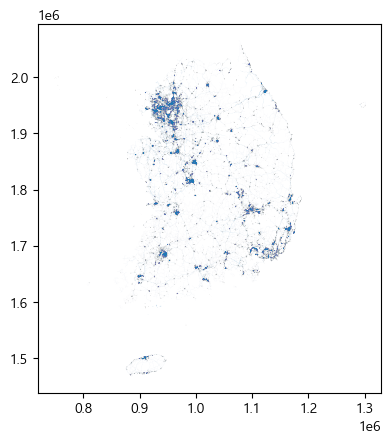

In [8]:
roads_poly.plot()

### 임도 데이터 

In [9]:
# 임도 데이터 불러오기 
folder_ids = [26, 27, 30, 31, 36, 41, 43, 44, 46, 47, 48, 50, 51, 52]
loaded = []
for id in folder_ids:
    gdf = gpd.read_file(f"./임도/{id}/{id}.shp")
    loaded.append(gdf)

In [10]:
merged = pd.concat(loaded, ignore_index=True)
merged = gpd.GeoDataFrame(merged, crs=loaded[0].crs)
trails = merged
trails.to_crs(epsg=5179, inplace=True)

In [11]:
trails.describe()

,HSTR_MNNMB,FRRD_FCLTD,FRRD_FCLTW,RBP_X,RBP_Y,REP_X,REP_Y,Shape_Leng
count,3082.0,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000
mean,0.0,2.793358,3.731181,300890.247761,465368.348191,300889.059832,465650.953199,2759.521842
std,0.0,2.707111,0.555733,70252.057764,124776.653653,70227.524167,124776.378799,2681.355030
min,0.0,0.060000,1.000000,120385.091196,78234.040117,120235.885134,77665.106060,24.195643
25%,0.0,1.310000,3.000000,253705.630660,396420.146142,253763.910674,396307.252872,1291.629540
50%,0.0,2.000000,4.000000,303070.944671,498089.154564,302862.225916,498650.899608,1996.375742
75%,0.0,3.000000,4.000000,362170.447035,558198.858517,361815.808310,558811.985825,3021.761663
max,0.0,24.210000,6.000000,414951.629265,639901.355193,413988.391615,639685.535268,24326.898323


In [12]:
# 임도 선마다 각 폭 * 1/2 + 50m 버퍼 설정 => polygon으로 변환.
trails_poly = trails.apply(
    lambda row: row.geometry.buffer(row["FRRD_FCLTW"] / 2), 
    axis=1
)

In [13]:
trails_poly.head()

0    POLYGON ((1153047.958 1701950.554, 1153045.309...
1    POLYGON ((1153162.231 1700570.743, 1153162.35 ...
2    POLYGON ((1153622.645 1694266.877, 1153621.76 ...
3    POLYGON ((1121846.851 1801933.166, 1121846.618...
4    POLYGON ((1120905.926 1801352.142, 1120906.344...
dtype: geometry

### 등산로 데이터 

In [14]:
mtn_trails = gpd.read_file(f"./등산로/TB_FGDI_WG_MT_WAY_ALL.shp")
mtn_trails.to_crs(epsg=5179)
mtn_trails.head()

,PMNTN_SN,MNTN_CODE,MNTN_NM,PMNTN_NM,PMNTN_MAIN,PMNTN_LT,PMNTN_DFFL,PMNTN_UPPL,PMNTN_GODN,PMNTN_MTRQ,PMNTN_CNRL,PMNTN_CLS,PMNTN_RISK,PMNTN_RECO,DATA_STDR,MNTN_ID,geometry
0,172,451100101,가련산,덕진동1가구간,None,0.13,쉬움,2,2,None,None,None,None,None,2016-12-31,451100101,"LINESTRING (965642.542 1761089.35, 965639.803 ..."
1,173,451100101,가련산,덕진동1가구간,None,0.04,쉬움,1,0,None,None,None,None,None,2016-12-31,451100101,"LINESTRING (965653.513 1760979.882, 965657.442..."
2,174,451100101,가련산,덕진동2가구간,None,0.02,쉬움,1,0,None,None,None,None,None,2016-12-31,451100101,"LINESTRING (965517.934 1761044.646, 965515.333..."
3,175,451100101,가련산,덕진동2가구간,None,0.10,쉬움,2,1,None,None,None,None,None,2016-12-31,451100101,"LINESTRING (965515.309 1760998.704, 965514.719..."
4,176,451100101,가련산,덕진동2가구간,None,0.15,쉬움,3,2,None,None,None,None,None,2016-12-31,451100101,"LINESTRING (965505.579 1760900.839, 965506.713..."


In [15]:
mtn_trails = mtn_trails.apply(
    lambda row: row.geometry.buffer(2), 
    axis=1
)

In [16]:
mtn_trails_poly = mtn_trails.geometry
mtn_trails_poly.head()

0    POLYGON ((965641.423 1761085.288, 965639.068 1...
1    POLYGON ((965657.401 1760975.657, 965657.231 1...
2    POLYGON ((965516.844 1761040.335, 965516.762 1...
3    POLYGON ((965516.849 1760997.185, 965517.971 1...
4    POLYGON ((965508.281 1760899.918, 965511.107 1...
dtype: geometry

#### 도로, 임도, 등산로 합치기 

In [17]:
Way_poly = pd.concat([roads_poly,trails_poly,mtn_trails_poly], ignore_index=True)
Way_poly = gpd.GeoDataFrame(
    {'geometry': Way_poly},
    crs="EPSG:5179"
)

c:\Users\sc.lee\miniconda3\envs\wildfire_env\Lib\site-packages\geopandas\array.py:1638: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as KGD2002 / Unified CS (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


### 묘지 데이터 

In [18]:
graveyard = gpd.read_file("./묘지/TB_GRVY_BNDR_ALL.shp", encoding = "euc-kr")
graveyard.to_crs(epsg = 5179, inplace=True)
graveyard.head()

,OBJ_ID,CMTRY_NM,MNAGN_NM,CMTRY_AREA,geometry
0,1,지천리공동묘지,관리기관없음,8357,"POLYGON ((968572.788 1736042.727, 968584.286 1..."
1,2,공동묘지,관리기관없음,12857,"POLYGON ((964390.718 1736006.733, 964391.323 1..."
2,3,화정공동묘지,관리기관없음,6312,"POLYGON ((960763.248 1737928.948, 960754.743 1..."
3,4,공동묘지,관리기관없음,7013,"POLYGON ((976389.805 1740345.339, 976390.506 1..."
4,5,공동묘지,관리기관없음,1928,"POLYGON ((973073.536 1740871.336, 973073.196 1..."


In [19]:
graveyard_poly = graveyard.geometry

### 농지 데이터 

In [20]:
base_dir = Path("./농지")
loaded = []

for shp_path in base_dir.rglob("*.shp"):
    gdf = gpd.read_file(shp_path)
    loaded.append(gdf)

farm = gpd.GeoDataFrame(
    pd.concat(loaded, ignore_index=True), 
    crs=loaded[0].crs
)

In [21]:
farm.to_crs(epsg=5179, inplace = True)
farm_poly = farm["geometry"]

<Axes: >

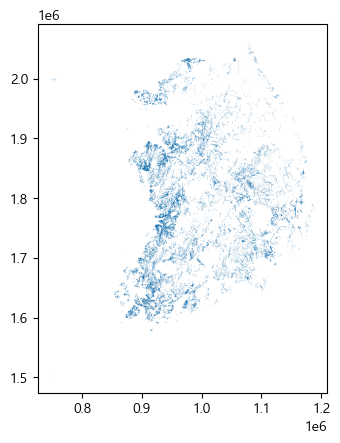

In [ ]:
farm_poly.plot()

#### 묘지, 농지 데이터 합치기 

In [23]:
Place_poly = pd.concat([farm_poly,graveyard_poly], ignore_index=True)
Place_poly = gpd.GeoDataFrame(
    {'geometry': Place_poly},
    crs="EPSG:5179"
)

#### 각 인간 활동 지역 데이터에 100m 버퍼 설정 후 저장 

In [ ]:
Place_poly_buff = Place_poly.buffer(100)
Way_poly_buff = Way_poly.buffer(100)

In [ ]:
# 오류 대처용 (다시 돌려보고 필요없으면 제거)
'''
place_invalid = ~Place_poly_buff.is_valid
way_invalid = ~Way_poly_buff.is_valid
Way_fixed = Way_poly_buff.copy()
Place_fixed = Place_poly_buff.copy()
Way_fixed[way_invalid] = Way_fixed[way_invalid].buffer(0)
Place_fixed[place_invalid] = Place_fixed[place_invalid].buffer(0)
Place_poly_buff = Place_fixed
Way_poly_buff = Way_fixed
'''

In [ ]:
# 저장
Place_poly_buff.to_file("Place_poly.gpkg", driver="GPKG")
Way_poly_buff.to_file("Way_poly.gpkg", driver="GPKG")

### 고도 데이터 

In [2]:
base_dir = Path("./지형도")
loaded = []

for shp_path in base_dir.rglob("*.shp"):
    gdf = gpd.read_file(shp_path)
    loaded.append(gdf)

alt = gpd.GeoDataFrame(
    pd.concat(loaded, ignore_index=True), 
    crs=loaded[0].crs
)

In [3]:
alt = alt.rename(columns={
    "UFID":       "contour_uid",
    "DIVI":       "contour_type_code",
    "CONT":       "elevation_m",
    "SCLS":       "integrated_code",
    "FMTA":       "producer_info",
    "MAPID":      "map_id",
    "SHAPE_Leng": "length_m"
})

In [4]:
alt.drop(columns= ["integrated_code", "producer_info","map_id"], inplace=True)

In [9]:
alt_coarse = alt[alt.contour_type_code == "CTC001"].copy()

In [11]:
alt_coarse['geometry'] = alt_coarse.geometry.simplify(
    tolerance=50, preserve_topology=True
)

In [ ]:
alt_coarse.drop(columns=["contour_type_code", "length_m"], inplace=True)

In [44]:
alt_coarse.head()

,contour_uid,elevation_m,geometry
0,100033601010F00110100000000597330,0.0,"LINESTRING (884543.241 1555527.686, 884172.468..."
1,100033601010F00110100000000597311,25.0,"LINESTRING (884548.259 1555939.214, 884183.326..."
2,100033601010F00110100000000597316,100.0,"LINESTRING (884456.429 1555718.228, 884443.16 ..."
3,100033601010F00110100000000597329,0.0,"LINESTRING (884541.892 1555417.15, 884542.148 ..."
4,100033601010F00110100000000597322,100.0,"LINESTRING (884349.622 1555720.594, 884366.622..."


In [ ]:
#alt_coarse.to_file("./modified_geopackage/Altitude.gpkg", driver="GPKG")
#alt_coarse = gpd.read_file("./modified_geopackage/Altitude.gpkg")
#alt_coarse.to_crs(epsg = 5179, inplace=True)

In [3]:
# 읍면동 경계 불러오기 
emd = gpd.read_file(f"./emd/emd.shp", encoding="euc-kr")
emd.set_crs(epsg=5179, inplace=True)

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.19 19..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,Changseong-dong,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."
...,...,...,...,...
5060,51830310,Seo-myeon,서면,"POLYGON ((1079287.552 2011045.57, 1079356.15 2..."
5061,51830320,Sonyang-myeon,손양면,"MULTIPOLYGON (((1102997.769 2009910.288, 11029..."
5062,51830330,Hyeonbuk-myeon,현북면,"MULTIPOLYGON (((1108475.024 2002913.557, 11084..."
5063,51830340,Hyeonnam-myeon,현남면,"MULTIPOLYGON (((1114466.017 1992227.421, 11145..."


In [4]:
contours_emd = gpd.sjoin(alt_coarse, emd, how = "inner", predicate= "intersects")

In [119]:
contours_emd.head()

,contour_uid,elevation_m,geometry,index_right,EMD_CD,EMD_ENG_NM,EMD_KOR_NM
3,100033601010F00110100000000597329,0.0,"LINESTRING (884541.892 1555417.15, 884542.148 ...",4738,50110320,Chuja-myeon,추자면
7,100033602004F00110100000000597866,100.0,"LINESTRING (893775.418 1554986.898, 893779.354...",4738,50110320,Chuja-myeon,추자면
11,100033602023F00110100000000597386,150.0,"LINESTRING (890851.19 1551403.879, 890838.866 ...",4738,50110320,Chuja-myeon,추자면
16,100033602001F00110100000000597628,25.0,"LINESTRING (884543.682 1555563.967, 884564.348...",4738,50110320,Chuja-myeon,추자면
17,100033602014F00110100000000597999,50.0,"LINESTRING (892619.465 1551906.443, 892477.816...",4738,50110320,Chuja-myeon,추자면


In [ ]:
contour_stats_by_emd = (
    contours_emd
    .groupby('EMD_CD')['elevation_m']
    .agg(['mean','std'])
)

contour_stats_by_emd["length"] = (
    contours_emd
    .groupby("EMD_CD")
    .apply(len)
)

C:\Users\sc.lee\AppData\Local\Temp\ipykernel_33420\3617236188.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(len)


In [ ]:
contour_stats_by_emd["EMD_CD"] = contour_stats_by_emd.index
contour_stats_by_emd.loc[contour_stats_by_emd["std"].isna(), "std"] = 0
contour_stats_by_emd

,mean,std,length,EMD_CD
EMD_CD,,,,
11110101,173.809524,73.940935,21,11110101
11110102,87.500000,32.274861,4,11110102
11110103,50.000000,0.000000,1,11110103
11110109,160.000000,71.879529,10,11110109
11110110,50.000000,0.000000,3,11110110
...,...,...,...,...
51830310,660.853909,344.959650,1458,51830310
51830320,97.925764,63.163660,229,51830320
51830330,369.624682,289.702053,786,51830330


# 등고선 없는 읍면동의 주변 등고선 매핑 후 고도 계산

In [125]:
no_contour_emds = emd[~emd.EMD_CD.isin(contour_stats_by_emd.EMD_CD)]

In [ ]:
no_contour_emds["centroids"] = no_contour_emds.geometry.centroid
no_contour_emds.drop(columns=["geometry"], inplace = True)
no_contour_emds = gpd.GeoDataFrame(no_contour_emds, geometry="centroids", crs = 5179)

C:\Users\sc.lee\AppData\Local\Temp\ipykernel_33420\88066524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_contour_emds.drop(columns=["geometry"], inplace = True)


In [63]:
no_contour_emds

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,centroids
3,11110104,Hyoja-dong,효자동,POINT (953377.196 1953828.779)
4,11110105,Changseong-dong,창성동,POINT (953421.942 1953594.746)
5,11110106,Tongui-dong,통의동,POINT (953455.311 1953319.068)
6,11110107,Jeokseon-dong,적선동,POINT (953534.924 1953012.833)
7,11110108,Tongin-dong,통인동,POINT (953222.585 1953551.591)
...,...,...,...,...
5036,51780370,Imnam-myeon,임남면,POINT (1029351.329 2032374.722)
5046,51800340,Haean-myeon,해안면,POINT (1054726.478 2031725.179)
5054,51820253,Geojin-eup,거진읍,POINT (1079282.978 2048179.409)
5055,51820310,Hyeonnae-myeon,현내면,POINT (1076868.96 2057906.047)


In [ ]:
rows = []

for idx, centroid in no_contour_emds.centroids.items():
    distances = alt_coarse.geometry.distance(centroid)
    nearest_2 = alt_coarse.loc[distances.nsmallest(2).index].copy()
    nearest_2['EMD_CD'] = no_contour_emds.loc[idx].EMD_CD
    
    rows.append(nearest_2)


In [97]:
lis = []
for i in rows:
    me = i.elevation_m.mean()
    lis.append((i.END_CD.unique()[0], me))

In [126]:
for em, mea in lis:
    contour_stats_by_emd.loc[em] = {
        "mean" : mea, "std" : 0, "length" : 0, "EMD_CD" : em
    }

# 읍면동 별 등고 통계 수치 저장

In [129]:
contour_stats_by_emd = contour_stats_by_emd.rename(columns={
    "mean": "ctr_mean",
    "std": "ctr_std",
    "length": "n_ctrs"
})

In [130]:
contour_stats_by_emd

,ctr_mean,ctr_std,n_ctrs,EMD_CD
EMD_CD,,,,
11110101,173.809524,73.940935,21,11110101
11110102,87.500000,32.274861,4,11110102
11110103,50.000000,0.000000,1,11110103
11110109,160.000000,71.879529,10,11110109
11110110,50.000000,0.000000,3,11110110
...,...,...,...,...
51780370,300.000000,0.000000,0,51780370
51800340,462.500000,0.000000,0,51800340
51820253,25.000000,0.000000,0,51820253


In [131]:
contour_stats_by_emd.to_csv('elevation.csv', index=False)

### 청운동에 contours_by_emd plot그려서 validity check

In [132]:
intersect_contours = alt_coarse[alt_coarse.contour_uid.isin(contours_emd[contours_emd.EMD_CD == "11110101"].contour_uid)]

In [133]:
cut_contours = gpd.overlay(intersect_contours, emd[emd.EMD_CD == "11110101"], how = "intersection")

<Axes: >

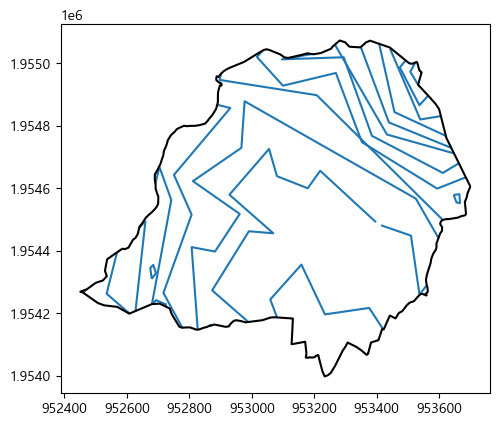

In [134]:
ax = cut_contours.plot()
emd.boundary.loc[0:0].plot(ax =ax,color = "black")